# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', encoding='UTF-8')
df_seoul_bus_station.head()

,자치구,버스정류장수,버스노선수,승차총승객수,하차총승객수,평균승차승객수,평균하차승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [5]:
df_seoul_moving=pd.read_csv('df_soul_moving.csv',encoding='UTF-8')
df_seoul_moving.head()

,도착 시군구 코드,총 이동 시간,총 이동인구,평균 이동 시간(분),이동인구(합)
0,11010,9356120,19385709.60,21.349599,44.235978
1,11020,9306020,19715322.61,21.012462,44.516072
2,11030,8514380,14707082.87,21.364786,36.903883
3,11040,8887140,17449273.95,21.740324,42.685596
4,11050,8625540,17947278.99,22.474283,46.762548


In [6]:
df_seoul_business=pd.read_csv('df_seoul_business.csv', encoding='UTF-8', thousands=',')
df_seoul_business.head()

,자치구,택시운송업.1,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
0,종로구,215,5912,3613,1413
1,중구,235,6414,3542,982
2,용산구,523,2987,2076,1332
3,성동구,2527,2785,1859,621
4,광진구,1744,2861,1887,1577


In [7]:
df_seoul_people=pd.read_csv('df_seoul_people.csv', encoding='UTF-8')
df_seoul_people.head()

,자치구,남자,여자,내국인수,외국인수,세대당인구,65세이상고령자,자치구주민수
0,중구,63869,67581,122173,9277,1.92,24742,131450
1,용산구,114571,121947,222169,14349,2.00,39461,236518
2,성동구,141662,149947,285073,6536,2.12,46896,291609
3,광진구,169525,183585,340707,12403,2.01,52604,353110
4,동대문구,172318,180274,337982,14610,1.99,62963,352592


In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df=pd.merge(standard, df_seoul_moving)

In [9]:
df=pd.merge(df, df_seoul_bus_station)

In [10]:
df=pd.merge(df, df_seoul_people)

In [11]:
df=pd.merge(df, df_seoul_business)

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df.head()

,도착 시군구 코드,자치구,총 이동 시간,총 이동인구,평균 이동 시간(분),이동인구(합),버스정류장수,버스노선수,승차총승객수,하차총승객수,...,여자,내국인수,외국인수,세대당인구,65세이상고령자,자치구주민수,택시운송업.1,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
0,11020,중구,9306020,19715322.61,21.012462,44.516072,178,103,3776675,3598932,...,67581,122173,9277,1.92,24742,131450,235,6414,3542,982
1,11030,용산구,8514380,14707082.87,21.364786,36.903883,323,67,4189977,4086474,...,121947,222169,14349,2.00,39461,236518,523,2987,2076,1332
2,11040,성동구,8887140,17449273.95,21.740324,42.685596,435,58,2807280,2746738,...,149947,285073,6536,2.12,46896,291609,2527,2785,1859,621
3,11050,광진구,8625540,17947278.99,22.474283,46.762548,269,41,2749448,2753411,...,183585,340707,12403,2.01,52604,353110,1744,2861,1887,1577
4,11060,동대문구,8838130,16288077.28,21.673451,39.942708,306,73,5240565,5115379,...,180274,337982,14610,1.99,62963,352592,2093,3566,1472,1082


In [13]:
df

,도착 시군구 코드,자치구,총 이동 시간,총 이동인구,평균 이동 시간(분),이동인구(합),버스정류장수,버스노선수,승차총승객수,하차총승객수,...,여자,내국인수,외국인수,세대당인구,65세이상고령자,자치구주민수,택시운송업.1,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
0,11020,중구,9306020,19715322.61,21.012462,44.516072,178,103,3776675,3598932,...,67581,122173,9277,1.92,24742,131450,235,6414,3542,982
1,11030,용산구,8514380,14707082.87,21.364786,36.903883,323,67,4189977,4086474,...,121947,222169,14349,2.00,39461,236518,523,2987,2076,1332
2,11040,성동구,8887140,17449273.95,21.740324,42.685596,435,58,2807280,2746738,...,149947,285073,6536,2.12,46896,291609,2527,2785,1859,621
3,11050,광진구,8625540,17947278.99,22.474283,46.762548,269,41,2749448,2753411,...,183585,340707,12403,2.01,52604,353110,1744,2861,1887,1577
4,11060,동대문구,8838130,16288077.28,21.673451,39.942708,306,73,5240565,5115379,...,180274,337982,14610,1.99,62963,352592,2093,3566,1472,1082
5,11070,중랑구,7939300,13907465.59,23.412789,41.012753,380,48,3792541,3740923,...,199977,389043,4557,2.07,72851,393600,6262,2479,1037,1000
6,11080,성북구,9072420,18757182.35,22.160283,45.816273,602,99,6236424,6231238,...,230403,433150,9530,2.20,75719,442680,2643,2822,1384,1030
7,11090,강북구,7649610,12570412.30,23.811274,39.128470,413,67,4825181,4671783,...,154890,297384,3440,2.05,64961,300824,2589,2663,1095,1275
8,11100,도봉구,6995880,10821566.75,24.489976,37.882283,359,46,3304305,3211421,...,163660,316098,2002,2.28,65122,318100,5783,2009,837,477
9,11110,노원구,8975240,20611941.03,24.029515,55.184590,514,57,4353295,4292724,...,267028,510486,3959,2.33,89426,514445,6074,2650,1748,844


In [14]:
temp = df.iloc[:, [1,3,5,6,7, -5]]
temp

,자치구,총 이동인구,이동인구(합),버스정류장수,버스노선수,자치구주민수
0,중구,19715322.61,44.516072,178,103,131450
1,용산구,14707082.87,36.903883,323,67,236518
2,성동구,17449273.95,42.685596,435,58,291609
3,광진구,17947278.99,46.762548,269,41,353110
4,동대문구,16288077.28,39.942708,306,73,352592
5,중랑구,13907465.59,41.012753,380,48,393600
6,성북구,18757182.35,45.816273,602,99,442680
7,강북구,12570412.30,39.128470,413,67,300824
8,도봉구,10821566.75,37.882283,359,46,318100
9,노원구,20611941.03,55.184590,514,57,514445


In [15]:
temp['정류장별주민수'] = temp['자치구주민수']/temp['버스노선수']
temp['주민수별이동인구'] = temp['총 이동인구']/temp['자치구주민수']
temp.sort_values(by='정류장별주민수', ascending = False)

C:\Users\User\AppData\Local\Temp\ipykernel_5156\2313266804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['정류장별주민수'] = temp['자치구주민수']/temp['버스노선수']
C:\Users\User\AppData\Local\Temp\ipykernel_5156\2313266804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['주민수별이동인구'] = temp['총 이동인구']/temp['자치구주민수']


,자치구,총 이동인구,이동인구(합),버스정류장수,버스노선수,자치구주민수,정류장별주민수,주민수별이동인구
23,강동구,21101460.33,64.249687,369,21,465097,22147.476190,45.370020
22,송파구,34837613.05,83.493581,415,55,668261,12150.200000,52.131747
14,강서구,21839762.06,58.447282,566,49,578426,11804.612245,37.757227
9,노원구,20611941.03,55.184590,514,57,514445,9025.350877,40.066365
3,광진구,17947278.99,46.762548,269,41,353110,8612.439024,50.826312
5,중랑구,13907465.59,41.012753,380,48,393600,8200.000000,35.334008
13,양천구,15069643.56,46.544142,319,56,449378,8024.607143,33.534449
8,도봉구,10821566.75,37.882283,359,46,318100,6915.217391,34.019386
10,은평구,16495472.31,50.260428,501,71,476013,6704.408451,34.653407
21,강남구,44684651.43,90.226636,499,91,537338,5904.813187,83.159299


In [16]:
temp.head(10)

,자치구,총 이동인구,이동인구(합),버스정류장수,버스노선수,자치구주민수,정류장별주민수,주민수별이동인구
0,중구,19715322.61,44.516072,178,103,131450,1276.213592,149.983436
1,용산구,14707082.87,36.903883,323,67,236518,3530.119403,62.181664
2,성동구,17449273.95,42.685596,435,58,291609,5027.741379,59.837913
3,광진구,17947278.99,46.762548,269,41,353110,8612.439024,50.826312
4,동대문구,16288077.28,39.942708,306,73,352592,4830.027397,46.195255
5,중랑구,13907465.59,41.012753,380,48,393600,8200.000000,35.334008
6,성북구,18757182.35,45.816273,602,99,442680,4471.515152,42.371877
7,강북구,12570412.30,39.128470,413,67,300824,4489.910448,41.786600
8,도봉구,10821566.75,37.882283,359,46,318100,6915.217391,34.019386
9,노원구,20611941.03,55.184590,514,57,514445,9025.350877,40.066365


In [19]:
df.astype({'택시운송업.1': 'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   도착 시군구 코드     24 non-null     int64  
 1   자치구           24 non-null     object 
 2   총 이동 시간       24 non-null     int64  
 3   총 이동인구        24 non-null     float64
 4   평균 이동 시간(분)   24 non-null     float64
 5   이동인구(합)       24 non-null     float64
 6   버스정류장수        24 non-null     int64  
 7   버스노선수         24 non-null     int64  
 8   승차총승객수        24 non-null     int64  
 9   하차총승객수        24 non-null     int64  
 10  평균승차승객수       24 non-null     float64
 11  평균하차승객수       24 non-null     float64
 12  남자            24 non-null     int64  
 13  여자            24 non-null     int64  
 14  내국인수          24 non-null     int64  
 15  외국인수          24 non-null     int64  
 16  세대당인구         24 non-null     float64
 17  65세이상고령자      24 non-null     int64  
 18  자치구주민수        24 non-null     in

---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 정류장 수와 자치구 주민 수  
H0: 정류장 수와 자치구 주민 수는 연관이 없다  
H1: 정류장 수와 자치구 주민 수는 연관이 있다.

* 가설 2 총 이동 인구 수 와 자치구 주민수  
H0: 총 이동 인구 수와 자치구 주민 수는 연관이 없다.  
H1: 총 이동 인구 수와 자치구 주민 수는 연관이 있다.

* 가설 3 택시종사자수와 정류장 수  
HO: 택시종사자수와 정류장 수는 연관이 없다.  
H1: 택시종사자수와 정류장 수는 연관이 있다.

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [18]:
target = 

SyntaxError: invalid syntax (1535300224.py, line 1)

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [19]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst
import seaborn as sns

# p-value가 0.05보다 작다 == 대립가설이 맞았다.

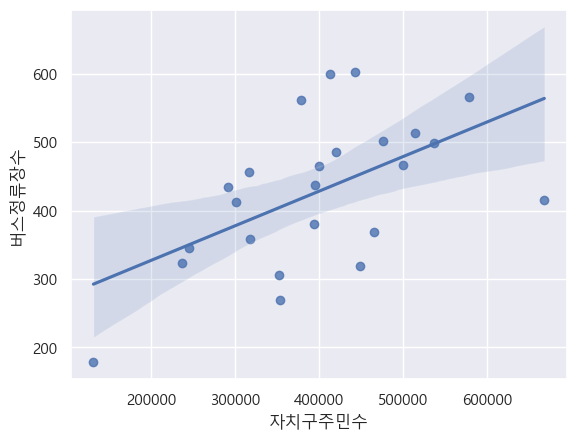

PearsonRResult(statistic=0.5586803960643874, pvalue=0.004545007662714087)


In [30]:
def reg(value, target, data):    
    sns.regplot(x=value, y=target, data=data)
    plt.show()
    print(spst.pearsonr(data[value],data[target]))
        
reg('자치구주민수', '버스정류장수', temp)

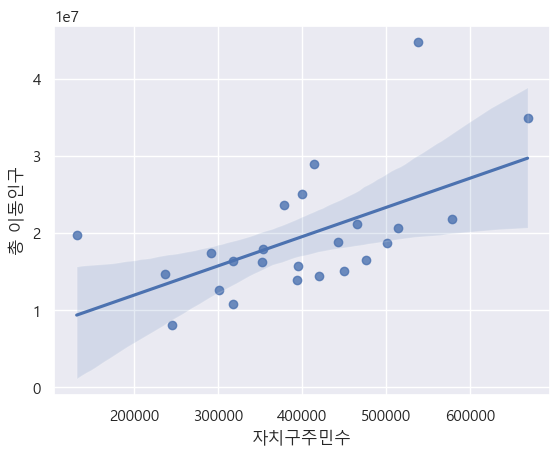

PearsonRResult(statistic=0.5723688284344475, pvalue=0.003469617787708926)


In [31]:
reg('자치구주민수', '총 이동인구', temp)

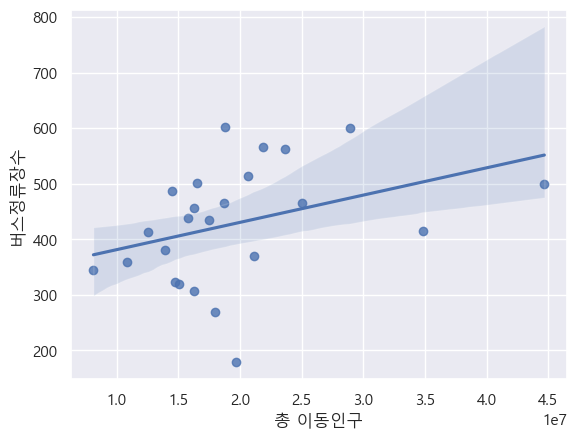

PearsonRResult(statistic=0.3592054137947753, pvalue=0.0847308602787029)


In [32]:
reg('총 이동인구', '버스정류장수', temp)

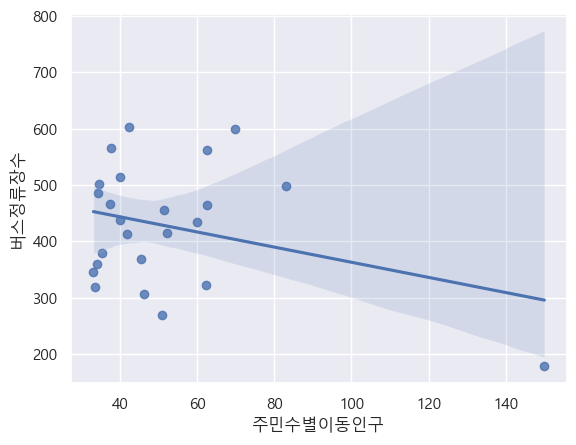

PearsonRResult(statistic=-0.3104434994614116, pvalue=0.1398283081117384)


In [33]:
reg('주민수별이동인구', '버스정류장수', temp)

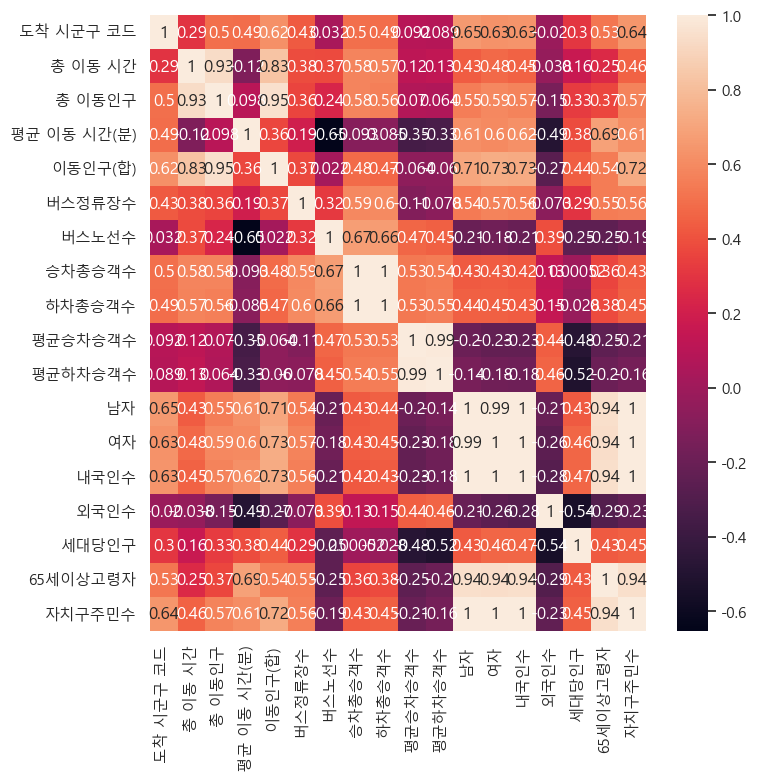

In [29]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?